Import and Install libraries

In [23]:
!pip install keras matplotlib tensorflow

In [24]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt


Normalize

In [25]:
(x_train , y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

To_categorical

In [26]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model Creation

In [27]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3))) #3 is for RGB channels
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


Run Model and Compile

In [28]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
result = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1648 - loss: 2.4850 - val_accuracy: 0.1732 - val_loss: 2.1032
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1794 - loss: 2.0683 - val_accuracy: 0.1826 - val_loss: 2.0814
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1831 - loss: 2.0617 - val_accuracy: 0.1848 - val_loss: 2.0610
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1824 - loss: 2.0586 - val_accuracy: 0.1721 - val_loss: 2.0527
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1820 - loss: 2.0629 - val_accuracy: 0.1892 - val_loss: 2.0717
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1821 - loss: 2.0566 - val_accuracy: 0.1856 - val_loss: 2.0571
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1819 - loss: 2.0534 - val_accuracy: 0.1811 - val_loss: 2.0809
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1822 - loss: 2.0560 - val_accuracy: 0.

Test and Prediction

In [29]:
(loss , accuracy) = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.02f}")
print(f"Test Accuracy: {accuracy*100:.02f}%")
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1731 - loss: 2.0930
Test Loss: 2.09
Test Accuracy: 17.31%
{'accuracy': [0.16482500731945038, 0.17937499284744263, 0.18312500417232513, 0.1823749989271164, 0.18197500705718994, 0.18205000460147858, 0.1818999946117401, 0.1821500062942505, 0.18437500298023224, 0.18207499384880066], 'loss': [2.4849536418914795, 2.068317174911499, 2.0617005825042725, 2.0585784912109375, 2.0628743171691895, 2.056637763977051, 2.0533783435821533, 2.0560462474823, 2.057147264480591, 2.0545661449432373], 'val_accuracy': [0.17319999635219574, 0.1826000064611435, 0.18479999899864197, 0.1720999926328659, 0.1891999989748001, 0.18559999763965607, 0.181099995970726, 0.16920000314712524, 0.17100000381469727, 0.1696999967098236], 'val_loss': [2.103236198425293, 2.0814409255981445, 2.0610194206237793, 2.052694320678711, 2.0717270374298096, 2.057145357131958, 2.0809426307678223, 2.073579788208008, 2.087660074234009, 2.0994913578033447]}


PLOT

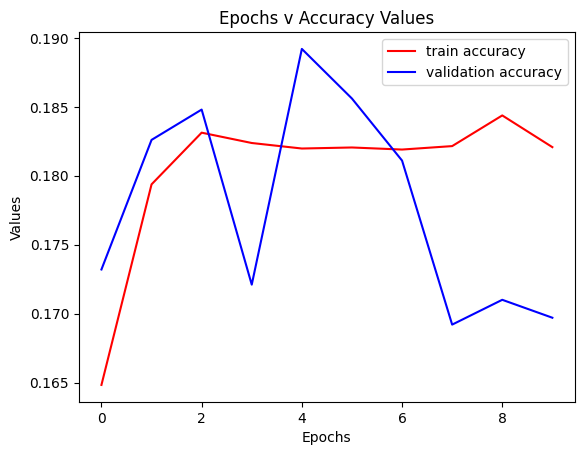

In [30]:
plt.plot(result.history['accuracy'], label='train accuracy', color='red')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='blue')
plt.title('Epochs v Accuracy Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()

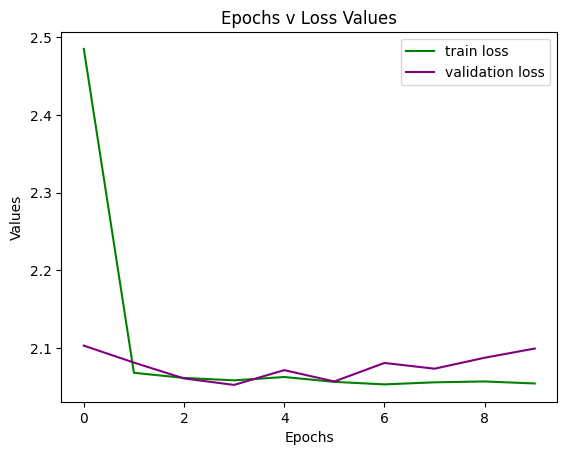

In [31]:
plt.plot(result.history['loss'], label='train loss', color='green')
plt.plot(result.history['val_loss'], label='validation loss', color='purple')
plt.title('Epochs v Loss Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()